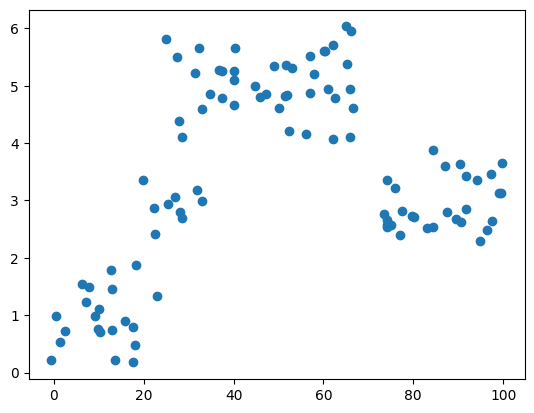

In [71]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(12345)

x = np.arange(0, 100) + np.random.normal(0, 3, size=100)

y = np.concatenate((
    np.random.normal(1, 0.5, size=10),
    np.random.normal(1, 0.5, size=10),
    np.random.normal(3, 0.5, size=10),
    np.random.normal(5, 0.5, size=40),
    np.random.normal(3, 0.5, size=30)
))

data = np.stack((x, y), axis=1)
plt.scatter(data[:, 0:1], data[:, 1:2]);

In [86]:
import ipywidgets as widgets

w_10 = widgets.FloatSlider(value=0.05, description='ww_10', max=5, min=-5, step=0.01, orientation='vertical')
w_11 = widgets.FloatSlider(value=0.03, description='ww_11', max=5, min=-5, step=0.01, orientation='vertical')
w_12 = widgets.FloatSlider(value=0.01, description='ww_12', max=5, min=-5, step=0.01, orientation='vertical')
w_13 = widgets.FloatSlider(value=0.02, description='ww_13', max=5, min=-5, step=0.01, orientation='vertical')
w_20 = widgets.FloatSlider(value=0.15, description='ww_20', max=5, min=-5, step=0.01, orientation='vertical')
w_21 = widgets.FloatSlider(value=0.25, description='ww_21', max=5, min=-5, step=0.01, orientation='vertical')
w_22 = widgets.FloatSlider(value=0.15, description='ww_22', max=5, min=-5, step=0.01, orientation='vertical')
ui = widgets.HBox([w_10, w_11, w_12, w_13, w_20, w_21, w_22])

# bias, always 1
b_00 = 1.
b_10 = 1.

# activation function
f = lambda x: 2.7 ** x

# deep learning network
def myDeep(weights, pt):
    x_11 = (b_00 * weights['ww_10']) + (pt * weights['ww_11'])
    x_12 = (b_00 * weights['ww_12']) + (pt * weights['ww_13'])
    a_11 = f(x_11)
    a_12 = f(x_12)
    return (b_10 * weights['ww_20']) + (a_11 * weights['ww_21']) + (a_12 * weights['ww_22'])

def draw(**weights):
    x_hat = np.linspace(0, 100, num=10)
    y_hat = myDeep(weights, x_hat)
    fig, ax = plt.subplots()
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 10)
    ax.scatter(data[:, 0:1], data[:, 1:2]);
    ax.scatter(x_hat, y_hat);

out = widgets.interactive_output(draw, {'ww_10': w_10, 'ww_11': w_11, 'ww_12': w_12, 'ww_13': w_13, 'ww_20': w_20, 'ww_21': w_21, 'ww_22': w_22})
display(ui, out)

Output()